# Binaray Classification 

In [1]:
 import tensorflow as tf
 from sklearn.datasets import make_circles
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt

In [2]:
n_samples = 1000
X,Y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)
pd.DataFrame(X,Y)

,0,1
1,0.754246,0.231481
1,-0.756159,0.153259
1,-0.815392,0.173282
1,-0.393731,0.692883
0,0.442208,-0.896723
...,...,...
0,0.244054,0.944125
0,-0.978655,-0.272373
1,-0.136900,-0.810012
0,0.670362,-0.767502


## Split The Data

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  random_state=42)
X_train,X_test,Y_train, Y_test = tf.cast(X_train, dtype=tf.float64) ,tf.cast(X_test, dtype=tf.float64),tf.cast(Y_train, dtype=tf.float64), tf.cast(Y_test, dtype=tf.float64)

## Plot The Data

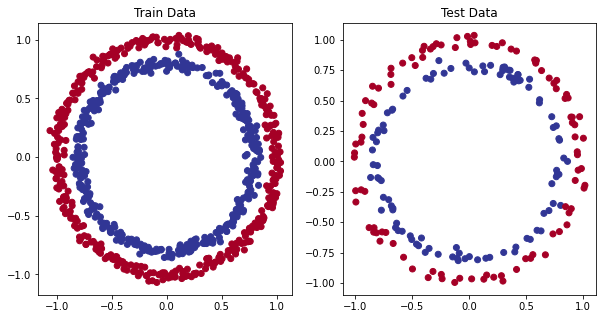

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train Data")
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.RdYlBu)
plt.subplot(1,2,2)
plt.title("Test Data")
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap=plt.cm.RdYlBu)


In [5]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

## Create The Model

In [6]:
tf.random.set_seed(42)

# create
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['Accuracy'])

#fit
history = model_0.fit(X_train, Y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6881 - Accuracy: 0.5238
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6714 - Accuracy: 0.5888
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6451 - Accuracy: 0.6850
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6026 - Accuracy: 0.7138
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5359 - Accuracy: 0.7850
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4705 - Accuracy: 0.8338
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3531 - Accuracy: 0.9525
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2496 - Accuracy: 0.9875
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1736 - Accuracy: 0.9925
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1388 - Accuracy: 0.9925
Epoch 11/

## Evaluate

In [7]:
model_0.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - Accuracy: 1.0000


[0.004139508120715618, 1.0]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


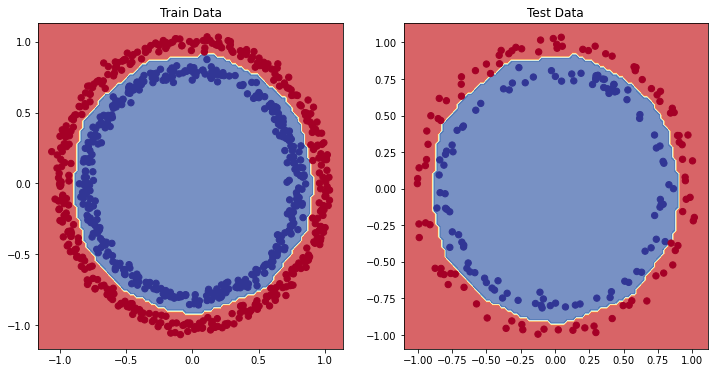

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Data")
plot_decision_boundary(model_0,X_train.numpy(),Y_train.numpy())
plt.subplot(1,2,2)
plt.title("Test Data")
plot_decision_boundary(model_0,X_test.numpy(),Y_test.numpy())

## Multi class classification